In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
from random import randrange

def random_add(img,where='train'):
    j = randrange(4) + 1
    newImg = img
    for i in range(0,j):
        if (where == 'train'):
            randomPick = randrange(x_train.shape[0])
            randomMagnitude = 1/(randrange(9)+1)
            newImg = newImg + randomMagnitude * x_train[randomPick]
    return newImg/(np.max(newImg))       

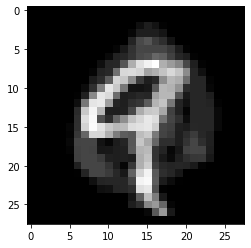

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.imshow(random_add(x_train[4]), cmap='gray')

In [ ]:
train_img_fit = []
train_label_fit = []
for i in range(0, x_train.shape[0]):
    train_img_fit.append(random_add(x_train[i]))
    train_img_fit.append(x_train[i])
    train_label_fit.append(y_train[i])
    train_label_fit.append(y_train[i])
train_img_fit = np.array(train_img_fit)
train_label_fit = np.array(train_label_fit)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_img_fit.shape

(120000, 28, 28)

In [ ]:
train_label_fit.shape

(120000,)

In [ ]:
model.fit(train_img_fit, train_label_fit, epochs=15)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3694 - accuracy: 0.8794
Epoch 2/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3368 - accuracy: 0.8880
Epoch 3/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3141 - accuracy: 0.8951
Epoch 4/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3005 - accuracy: 0.8983
Epoch 5/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2878 - accuracy: 0.9027
Epoch 6/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2783 - accuracy: 0.9052
Epoch 7/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2708 - accuracy: 0.9076
Epoch 8/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2635 - accuracy: 0.9090
Epoch 9/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2582 - accuracy: 0.9116
Epoch 10/15
3750/3750 [==============================] - 7s 2ms/step - loss: 0.251

[0.08772172778844833, 0.9781000018119812]